In [2]:
# Coursework for IIP Task1
# Junyu Liu 20216355

In [3]:
#--- Import libraries ---#
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [4]:
#--- Calculate SNR ---#
def calSNR(inputImg, groundTruthImg):
    mse = np.mean((inputImg.astype(np.float32) - groundTruthImg.astype(np.float32)) ** 2)
    m = np.mean((inputImg.astype(np.float32)) ** 2)
    
    return 10 * math.log(m / mse, 10)

In [5]:
#--- Customized filters / image processing techniques ---#
#--- Customized filter to sharpen the image ---#
# modified from the reference: https://www.whcsrl.com/blog/1008390
def custom_sharpen(image):
    kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]], np.float32)
    new_image = cv2.filter2D(image, -1, kernel=kernel)
    return new_image

#--- Add intensity transform to adjust contrast and brightness ---#
# modified from the reference: https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html
def intensity_transform(image, alpha, beta):
    new_image = np.zeros(image.shape, image.dtype)
    
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
                
    return new_image

In [6]:
#--- Processing image 1 ---#
def img1Processing(img1, imgGroundTruth):
    
    #--- Calculate the SNR for image 1 berfore processing ---#
    print("--- The SNR result for img 1 ---")
    img1SNR_before = calSNR(img1, imgGroundTruth)
    print("Before processing, the SNRinDB of img 1 is " + str(img1SNR_before))

    #--- Apply processing techniques on image 1 ---#
    # Kernel parameters
    ddepth = cv2.CV_16S
    kernel_size = 3
    
    # Step1 - Add gaussian blur
    # OpenCV built-in Gaussian blur filter is used.
    img1_gaussianBlur = cv2.GaussianBlur(img1,(9,9),0)
    
    # Step2 - Add bilateral filter
    # OpenCV built-in bilateral filter is used.
    img1_bilateralFilter = cv2.bilateralFilter(img1_gaussianBlur, 9, 75, 75)
    
    # Step3 -  Add laplacian and subtract
    # OpenCV built-in laplacian filter is used.
    img1_laplacian = cv2.Laplacian(img1_bilateralFilter, ddepth, ksize=kernel_size)
    img1_subtraction = img1_bilateralFilter - img1_laplacian
    img1_subtraction_unify = np.array(img1_subtraction, dtype='uint8')
    
    # Get the final image
    img1_after = img1_subtraction_unify.copy()
    
    #--- Calculate the SNR for image 1 after processing ---#
    img1SNR_after = calSNR(img1_after, imgGroundTruth)
    print("After processing,  the SNRinDB of img 1 is " + str(img1SNR_after) + '\n')
    
    # Save the processed image
    # Note that the url might be different on different computers, thus this line may need to be changed.
    cv2.imwrite('./results/Image1_after.png', img1_after)
    
    return img1_after

In [7]:
#--- Processing image 2 ---#
def img2Processing(img2, imgGroundTruth):
    
    #--- Calculate the SNR for image 2 berfore processing ---#
    print("--- The SNR result for img 2 ---")
    img2SNR_before = calSNR(img2, imgGroundTruth)
    print("Before processing, the SNRinDB of img 2 is " + str(img2SNR_before))

    #--- Apply processing techniques on image 2 ---#
    # Kernel parameters
    ddepth = cv2.CV_16S
    kernel_size = 3
    
    # Step 1 - Add median blur
    # OpenCV built-in median blur filter is used.
    img2_medianBlur = cv2.medianBlur(img2, 3)
    
    # Step 2 - Use intensity transform
    # Customized intensity transform function is used.
    img2_transform = intensity_transform(img2_medianBlur, 1.1, 0)
    
    # Get the final image
    img2_after = img2_transform.copy()
    
    #--- Calculate the SNR for image 2 after processing ---#
    img2SNR_after = calSNR(img2_after, imgGroundTruth)
    print("After processing,  the SNRinDB of img 2 is " + str(img2SNR_after) + '\n')
    
    # Save the processed image
    # Note that the url might be different on different computers, thus this line may need to be changed.
    cv2.imwrite('./results/Image2_after.png', img2_after)
    
    return img2_after

In [8]:
#--- Processing image 3 ---#
def img3Processing(img3, imgGroundTruth):
    
    #--- Calculate the SNR for image 3 berfore processing ---#
    print("--- The SNR result for img 3 ---")
    img3SNR_before = calSNR(img3, imgGroundTruth)
    print("Before processing, the SNRinDB of img 3 is " + str(img3SNR_before))

    #--- Apply processing techniques on image 3 ---#
    # Kernel parameters
    ddepth = cv2.CV_16S
    kernel_size = 3
    
    # Step 1 - Equalize the histogram
    # OpenCV built-in histogram equalization method is used.
    img3_equalize = cv2.equalizeHist(img3)
    
    # Step 2 - Add Gaussian Blur to remove noise
    # OpenCV built-in Gaussian blur filter is used.
    img3_gaussianBlur = cv2.GaussianBlur(img3_equalize,(3,3),0)
    
    # Step 3 - Use Bilateral Filter to preserve edge details
    # OpenCV built-in bilateral filter is used.
    img3_bilateralFilter = cv2.bilateralFilter(img3_gaussianBlur, 9, 75, 75)

    # Step 4 - Sharpen the image
    # Customized image sharpening filter is used.
    img3_sharpen = custom_sharpen(img3_bilateralFilter)

    img3_after = img3_sharpen.copy()
    
    #--- Calculate the SNR for image 3 after processing ---#
    img3SNR_after = calSNR(img3_after, imgGroundTruth)
    print("After processing,  the SNRinDB of img 3 is " + str(img3SNR_after) + '\n')
    
    # Save the processed image
    # Note that the url might be different on different computers, thus this line may need to be changed.
    cv2.imwrite('./results/Image3_after.png', img3_after)
    
    return img3_after

In [9]:
#--- Show the comparions of ground truth image, before processing image and processed image ---#
def showComparison(imgGroundTruth, img1, img2, img3, img1_after, img2_after, img3_after):
    #--- Show the comparison of img1 ---#
    plt.figure(figsize = (15,15))
    plt.subplot(331), plt.imshow(imgGroundTruth,cmap='gray', vmin=0, vmax=255), plt.title('Truth')
    plt.subplot(332), plt.imshow(img1,cmap='gray', vmin=0, vmax=255), plt.title('Image 1 Before Processing')
    plt.subplot(333), plt.imshow(img1_after,cmap='gray', vmin=0, vmax=255), plt.title('Image 1 After Processing')
    
    #--- Show the comparison of img2 ---#
    plt.subplot(334), plt.imshow(imgGroundTruth,cmap='gray', vmin=0, vmax=255), plt.title('Truth')
    plt.subplot(335), plt.imshow(img2,cmap='gray', vmin=0, vmax=255), plt.title('Image 2 Before Processing')
    plt.subplot(336), plt.imshow(img2_after,cmap='gray', vmin=0, vmax=255), plt.title('Image 2 After Processing')
    
    #--- Show the comparison of img3 ---#
    plt.subplot(337), plt.imshow(imgGroundTruth,cmap='gray', vmin=0, vmax=255), plt.title('Truth')
    plt.subplot(338), plt.imshow(img3,cmap='gray', vmin=0, vmax=255), plt.title('Image 3 Before Processing')
    plt.subplot(339), plt.imshow(img3_after,cmap='gray', vmin=0, vmax=255), plt.title('Image 3 After Processing')

In [10]:
#--- Main function to call all processing functions ---#
random.seed(0)
def main():
    #--- Read imaage from folders ---#
    imgGroundTruth = cv2.imread("Task1_images/lena_gray.jpg", 0)
    img1 = cv2.imread("Task1_images/Image1.bmp", 0)
    img2 = cv2.imread("Task1_images/Image2.bmp", 0)
    img3 = cv2.imread("Task1_images/Image3.bmp", 0)
    
    #--- Call processing functions for each image respectively ---#
    img1_after = img1Processing(img1, imgGroundTruth)
    img2_after = img2Processing(img2, imgGroundTruth)
    img3_after = img3Processing(img3, imgGroundTruth)
    
    #---Show the comparions of ground truth image, before processing image and processed image ---#
    showComparison(imgGroundTruth, img1, img2, img3, img1_after, img2_after, img3_after)

--- The SNR result for img 1 ---
Before processing, the SNRinDB of img 1 is 10.014127716041902
After processing,  the SNRinDB of img 1 is 18.70451397782365

--- The SNR result for img 2 ---
Before processing, the SNRinDB of img 2 is 10.268019910025723
After processing,  the SNRinDB of img 2 is 20.741924255486914

--- The SNR result for img 3 ---
Before processing, the SNRinDB of img 3 is 10.625345468892482
After processing,  the SNRinDB of img 3 is 19.503340817183442



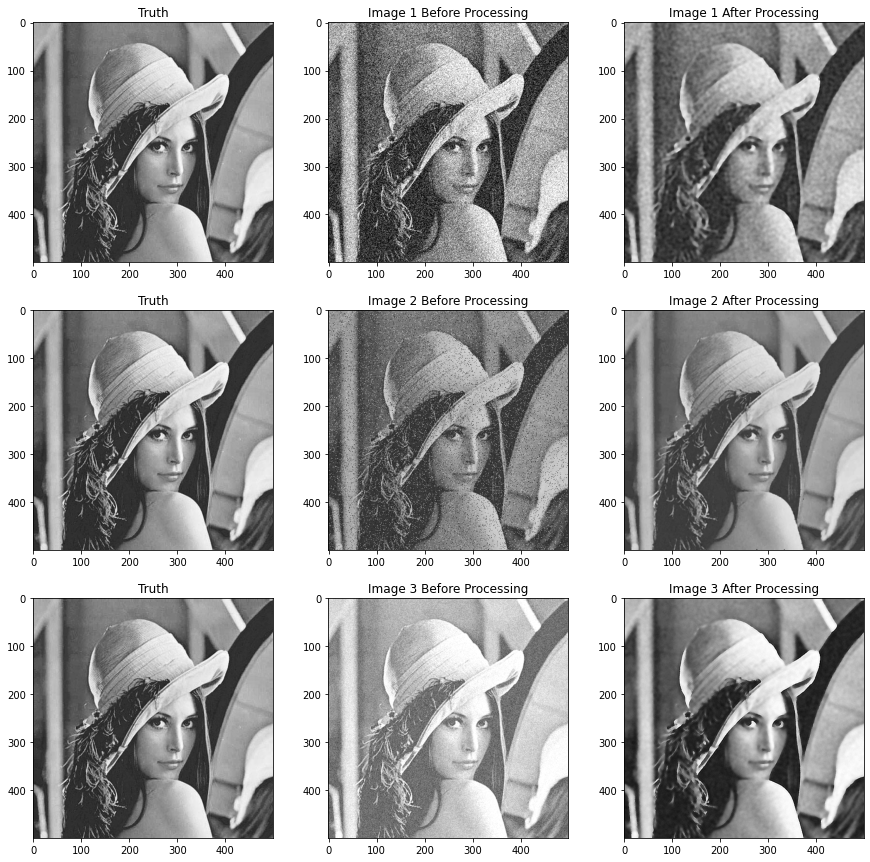

In [11]:
if __name__ == '__main__':
    main()